In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv("uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [12]:
# Task 1: Pre-process the dataset
# Drop irrelevant columns and handle datetime
df.drop(columns=['Unnamed: 0', 'key'], inplace=True)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['month'] = df['pickup_datetime'].dt.month
df.drop(columns=['pickup_datetime'], inplace=True)

In [13]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,3,5
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,4,7
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,0,8
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,4,6
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,3,8
...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,6,10
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,4,3
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,0,6
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,2,5


In [14]:
# Calculate distance (Haversine formula)
def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Earth radius in kilometers
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

In [15]:
df['distance_km'] = haversine(df['pickup_longitude'], df['pickup_latitude'],
                              df['dropoff_longitude'], df['dropoff_latitude'])

In [16]:
# Task 2: Identify and handle outliers
# Remove outliers for fare_amount and distance
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]
df = df[(df['distance_km'] > 0) & (df['distance_km'] < 50)]
df = df[df['passenger_count'] > 0]

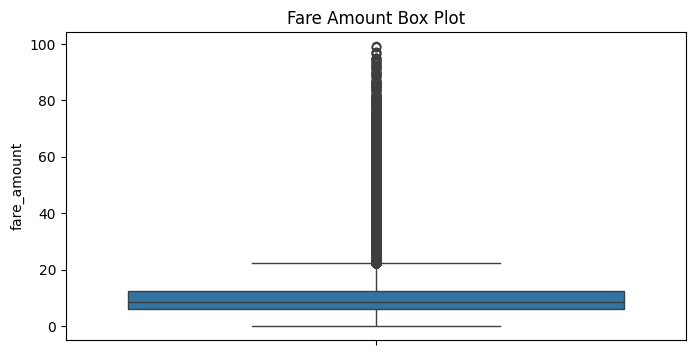

In [17]:
# Plot fare_amount to visually inspect for any remaining outliers
plt.figure(figsize=(8,4))
sns.boxplot(df['fare_amount'])
plt.title("Fare Amount Box Plot")
plt.show()

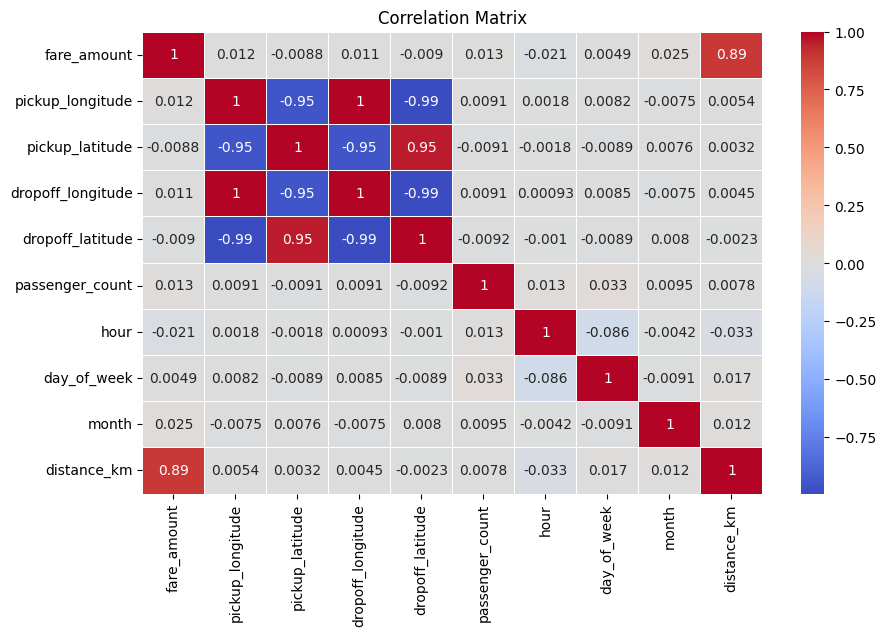

In [18]:
# Task 3: Check the correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [19]:
# Task 4: Define features and target, implement Linear Regression and Random Forest Regression models
# Define X (features) and y (target)
X = df[['distance_km', 'hour', 'day_of_week', 'month', 'passenger_count']]
y = df['fare_amount']

In [20]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [22]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=101)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [23]:
# Task 5: Evaluate models
# Linear Regression evaluation
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)
print(f"Linear Regression -> RMSE: {lr_rmse:.2f}, R²: {lr_r2:.2f}")

Linear Regression -> RMSE: 4.31, R²: 0.79


In [24]:
# Random Forest Regression evaluation
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regression -> RMSE: {rf_rmse:.2f}, R²: {rf_r2:.2f}")

Random Forest Regression -> RMSE: 4.30, R²: 0.79


In [25]:
# Compare model scores
print("\nModel Comparison:")
print(f"Linear Regression - RMSE: {lr_rmse:.2f}, R²: {lr_r2:.2f}")
print(f"Random Forest Regression - RMSE: {rf_rmse:.2f}, R²: {rf_r2:.2f}")


Model Comparison:
Linear Regression - RMSE: 4.31, R²: 0.79
Random Forest Regression - RMSE: 4.30, R²: 0.79
